In [1]:
#####Capstone RMBS model Spring 2021 for Springboard Data Science Track #####

In [2]:
###Load required pacakages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
#EDA data filepath downloaded and stored here
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/data_frame_for_EDA.csv'

In [5]:
df=pd.read_csv(filename, header =0, index_col=['Loan_Sequence_Number','Monthly_Reporting_Period'])

In [6]:
use_cols =['CS_HPA_20_cities', 'CS_HP', 'UNEMPLOY', 'LF_Part','Y10_CMT', 'Y30_fixed_mortgage_rate']

In [7]:
pca_df_final=df[use_cols]

In [8]:
pca_df_final.drop(labels=['CS_HPA_20_cities'], axis=1 ,inplace=True)

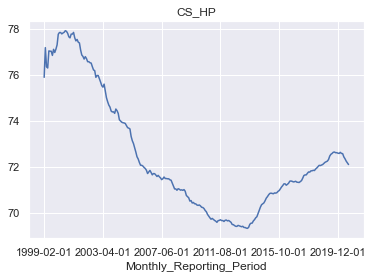

In [14]:
sns.set(style="darkgrid")
g=df.groupby(['Monthly_Reporting_Period'])['Original_LTV'].mean()
plt.title('CS_HP')
g.plot.line()
plt.show()

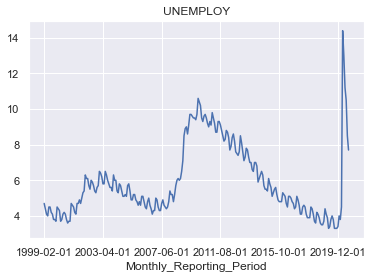

In [16]:
sns.set(style="darkgrid")
g=df.groupby(['Monthly_Reporting_Period'])['UNEMPLOY'].mean()
plt.title('UNEMPLOY')
g.plot.line()
plt.show()

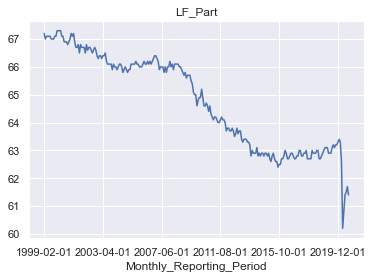

In [17]:
sns.set(style="darkgrid")
g=df.groupby(['Monthly_Reporting_Period'])['LF_Part'].mean()
plt.title('LF_Part')
g.plot.line()
plt.show()

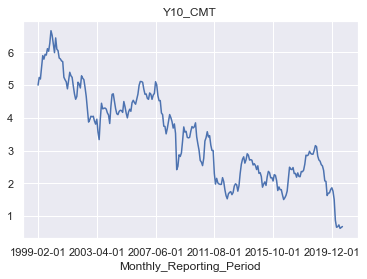

In [18]:
sns.set(style="darkgrid")
g=df.groupby(['Monthly_Reporting_Period'])['Y10_CMT'].mean()
plt.title('Y10_CMT')
g.plot.line()
plt.show()

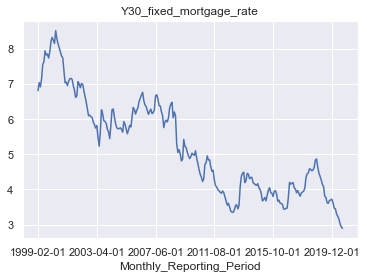

In [19]:
sns.set(style="darkgrid")
g=df.groupby(['Monthly_Reporting_Period'])['Y30_fixed_mortgage_rate'].mean()
plt.title('Y30_fixed_mortgage_rate')
g.plot.line()
plt.show()

In [20]:
pca_df_final.corr(method='pearson', min_periods=1)

,CS_HP,UNEMPLOY,LF_Part,Y10_CMT,Y30_fixed_mortgage_rate
CS_HP,1.000000,-0.391304,-0.608089,-0.475463,-0.468983
UNEMPLOY,-0.391304,1.000000,-0.038535,-0.206090,-0.187947
LF_Part,-0.608089,-0.038535,1.000000,0.875258,0.902848
Y10_CMT,-0.475463,-0.206090,0.875258,1.000000,0.971002
Y30_fixed_mortgage_rate,-0.468983,-0.187947,0.902848,0.971002,1.000000


In [21]:
len(pca_df_final.columns)

5

In [22]:
X = pca_df_final.values

In [23]:
X=StandardScaler().fit_transform(pca_df_final)
pca=PCA(n_components=5)
principalComponents=pca.fit_transform(X)

In [24]:
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print('='*70)
print(cumsum_var)

[0.64030969 0.26634745 0.06557308 0.02272187 0.00504791]
[64.03 90.66 97.22 99.49 99.99]


Text(0, 0.5, '% of Variance Explained')

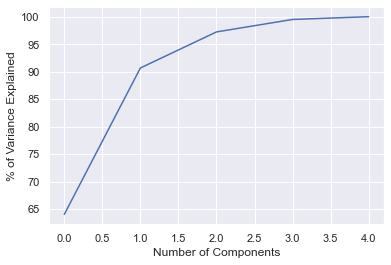

In [25]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

In [26]:
pd.DataFrame(principalComponents[:,:5])

,0,1,2,3,4
0,0.778274,1.459424,0.377046,-0.581439,0.114927
1,0.787633,1.334866,0.234115,-0.634683,-0.075853
2,0.970953,1.468792,0.432065,-0.455134,-0.246397
3,1.414794,1.548613,0.800921,-0.146626,-0.114012
4,1.176178,1.590453,0.724550,-0.149913,-0.137645
...,...,...,...,...,...
1045881,3.827001,-0.249420,-0.907117,0.189677,0.201617
1045882,3.899263,-0.343002,-0.874749,0.408852,0.131274
1045883,3.838437,-0.116833,-0.715091,0.380175,0.192866
1045884,3.826512,-0.117618,-0.706104,0.296967,0.185631


In [27]:
pca=PCA(n_components=5)
principalComponents=pca.fit_transform(X)

In [28]:
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print('='*75)
print(cumsum_var)

[0.64030969 0.26634745 0.06557308 0.02272187 0.00504791]
[64.03 90.66 97.22 99.49 99.99]


Text(0, 0.5, 'Explained of Variance')

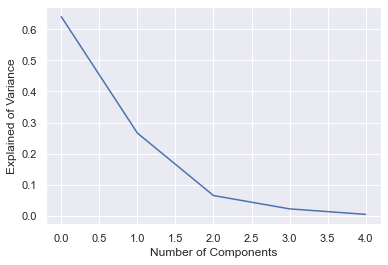

In [29]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained of Variance')

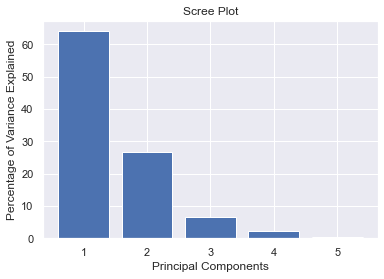

In [30]:
percent_variance=np.round(pca.explained_variance_ratio_*100,decimals=2)
plt.bar(x=range(1,6),height=percent_variance,tick_label=np.arange(1,6,1))
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [31]:
X=pd.DataFrame(X,columns=pca_df_final.columns)

In [32]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

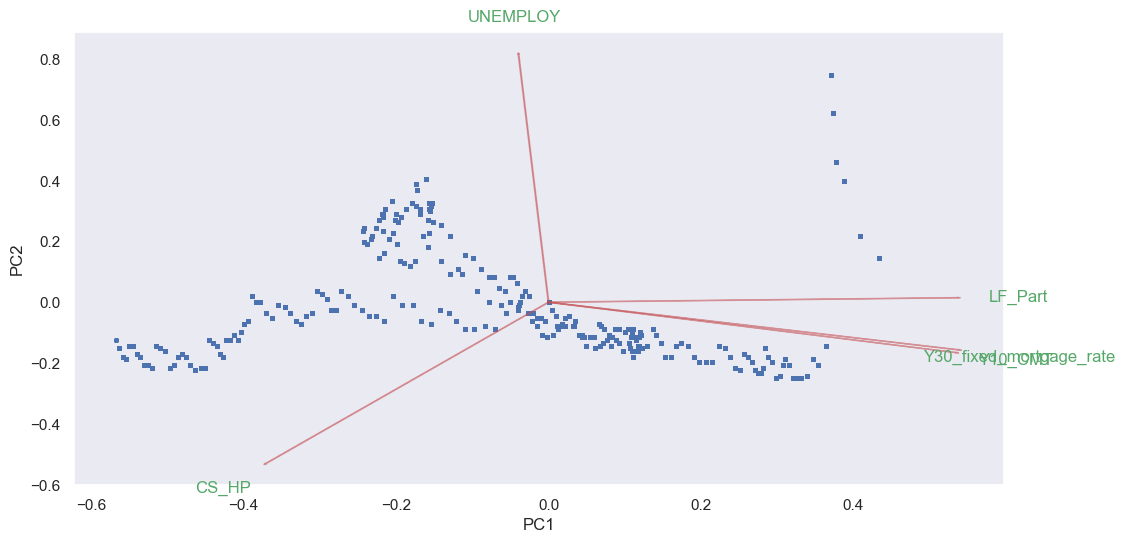

In [33]:
myplot(np.array(X)[:,0:2],np.transpose(pca.components_[0:2,:]),list(X.columns))
plt.show()

In [34]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [35]:
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5']
                              , index=pca_df_final.columns)
loading_matrix

,PC1,PC2,PC3,PC4,PC5
CS_HP,-0.663452,-0.612579,0.426526,-0.050724,-0.009007
UNEMPLOY,-0.070382,0.941786,0.328099,0.020696,-0.002893
LF_Part,0.958656,0.017059,0.056481,-0.277167,-0.026011
Y10_CMT,0.955195,-0.191197,0.114171,0.166881,-0.100814
Y30_fixed_mortgage_rate,0.961774,-0.180767,0.148549,0.077054,0.119625
